In [3]:
import pandas as pd

# Load the dataset from the local data folder
df = pd.read_csv('../data/student-mat.csv', sep=';')

# Preview the dataset
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00320/student-mat.csv"
df = pd.read_csv(url, sep=';')
df.head()


HTTPError: HTTP Error 404: Not Found

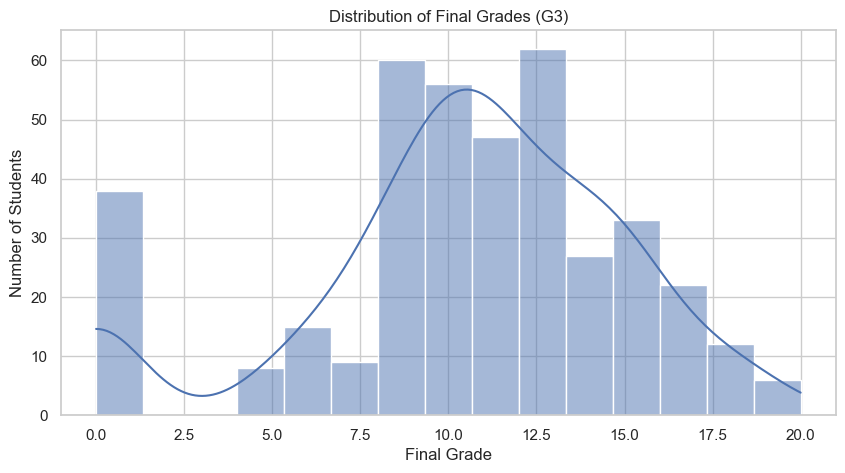

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['G3'], bins=15, kde=True)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade')
plt.ylabel('Number of Students')
plt.show()






In [9]:
df.isnull().sum()



school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [11]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [12]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()  # We'll work on this version for analysis

label_enc = LabelEncoder()

# Apply label encoding to all object (text) columns
for column in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[column] = label_enc.fit_transform(df_encoded[column])

df_encoded.head()


,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


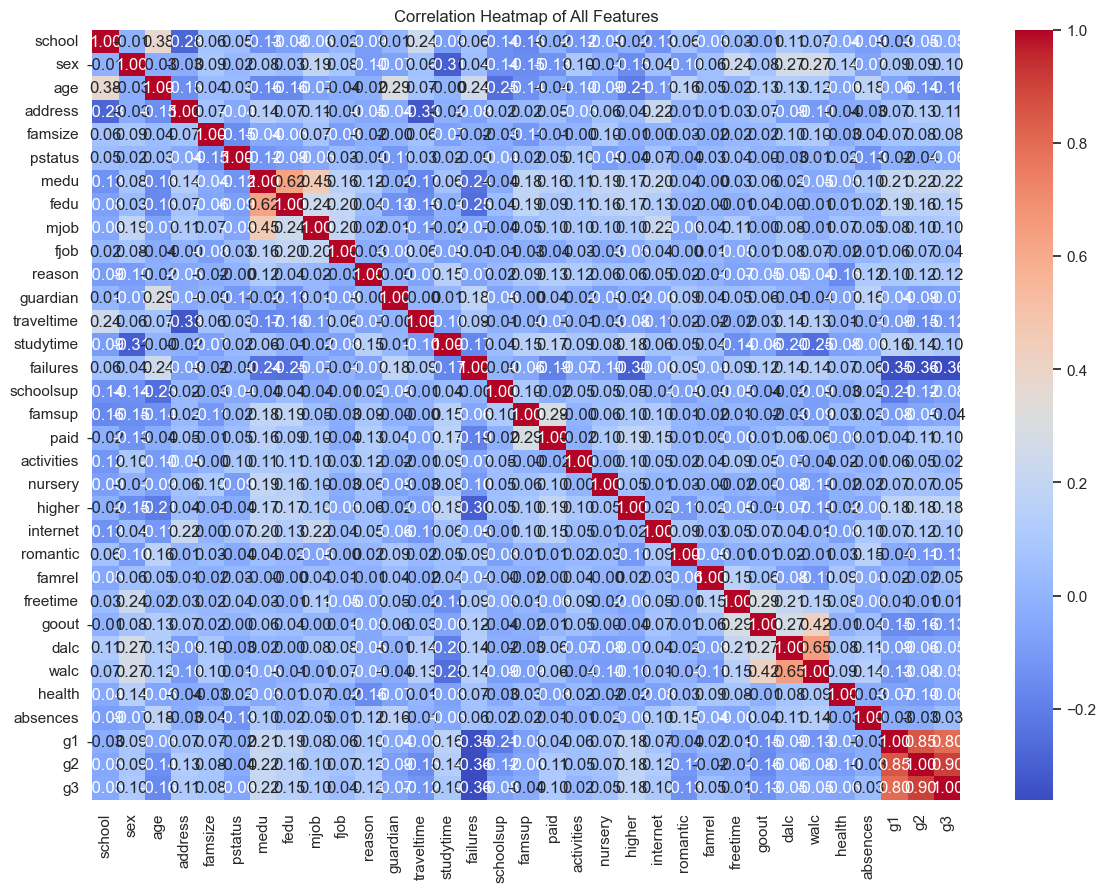

In [13]:
plt.figure(figsize=(14, 10))
corr_matrix = df_encoded.corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of All Features')
plt.show()


In [14]:
corr_matrix['g3'].sort_values(ascending=False)


g3            1.000000
g2            0.904868
g1            0.801468
medu          0.217147
higher        0.182465
fedu          0.152457
reason        0.121994
address       0.105756
sex           0.103456
mjob          0.102082
paid          0.101996
internet      0.098483
studytime     0.097820
famsize       0.081407
nursery       0.051568
famrel        0.051363
fjob          0.042286
absences      0.034247
activities    0.016100
freetime      0.011307
famsup       -0.039157
school       -0.045017
walc         -0.051939
dalc         -0.054660
pstatus      -0.058009
health       -0.061335
guardian     -0.070109
schoolsup    -0.082788
traveltime   -0.117142
romantic     -0.129970
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: g3, dtype: float64

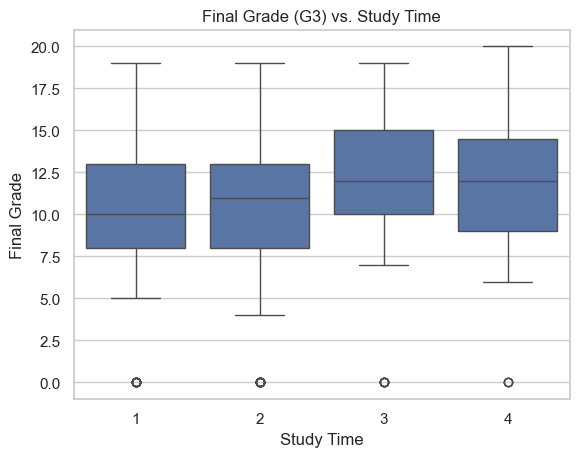

In [15]:
sns.boxplot(x='studytime', y='g3', data=df)
plt.title('Final Grade (G3) vs. Study Time')
plt.xlabel('Study Time')
plt.ylabel('Final Grade')
plt.show()


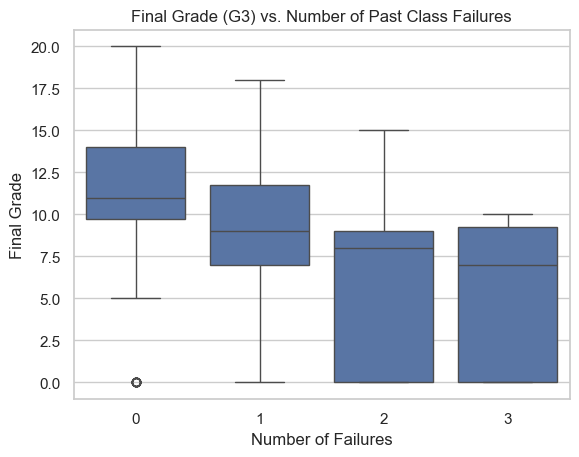

In [16]:
sns.boxplot(x='failures', y='g3', data=df)
plt.title('Final Grade (G3) vs. Number of Past Class Failures')
plt.xlabel('Number of Failures')
plt.ylabel('Final Grade')
plt.show()


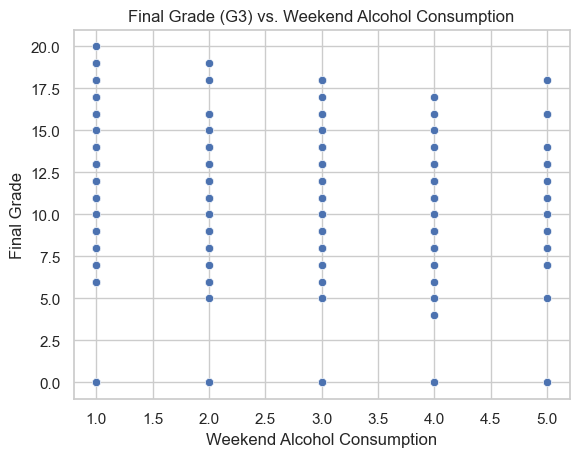

In [17]:
sns.scatterplot(x='walc', y='g3', data=df)
plt.title('Final Grade (G3) vs. Weekend Alcohol Consumption')
plt.xlabel('Weekend Alcohol Consumption')
plt.ylabel('Final Grade')
plt.show()


In [18]:
print("Shape:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())
df.info()
df.describe()


Shape: (395, 33)

Column Names:
 ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'dalc', 'walc', 'health', 'absences', 'g1', 'g2', 'g3']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   pstatus     395 non-null    object
 6   medu        395 non-null    int64 
 7   fedu        395 non-null    int64 
 8   mjob        395 non-null    object
 9   fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian 

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [19]:
# Check for missing values
df.isnull().sum()


school        0
sex           0
age           0
address       0
famsize       0
pstatus       0
medu          0
fedu          0
mjob          0
fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
dalc          0
walc          0
health        0
absences      0
g1            0
g2            0
g3            0
dtype: int64

In [21]:
df = pd.get_dummies(df, drop_first=True)


In [24]:
# Separate features (X) and target variable (y)
X = df_encoded.drop('G3', axis=1)
y = df_encoded['G3']


KeyError: "['G3'] not found in axis"

In [25]:
print(df_encoded.columns.tolist())


['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'dalc', 'walc', 'health', 'absences', 'g1', 'g2', 'g3']


In [27]:
# Corrected version using lowercase 'g3'
X = df_encoded.drop('g3', axis=1)
y = df_encoded['g3']


In [28]:
# Separate features (X) and target variable (y)
X = df_encoded.drop('G3', axis=1)
y = df_encoded['G3']


KeyError: "['G3'] not found in axis"

In [29]:
X = df_encoded.drop('g3', axis=1)
y = df_encoded['g3']


In [30]:
from sklearn.model_selection import train_test_split

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (316, 32)
Testing set: (79, 32)


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 5.03239410886674
R² Score: 0.7545777855043501


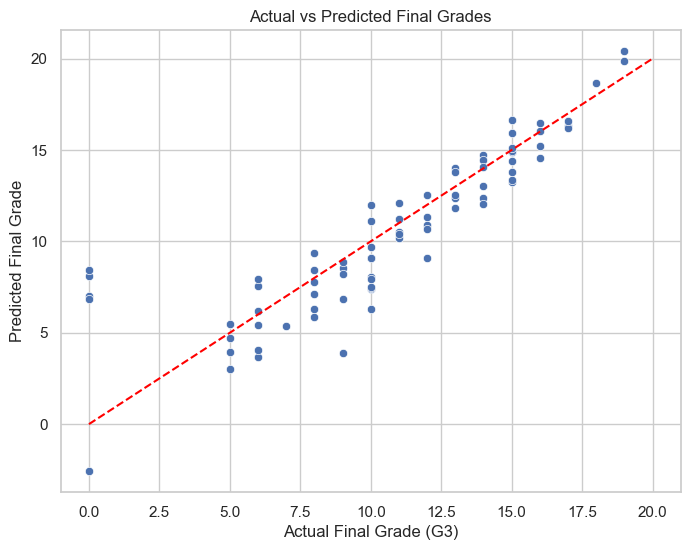

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the grades on test set
y_pred = model.predict(X_test)

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Final Grade (G3)")
plt.ylabel("Predicted Final Grade")
plt.title("Actual vs Predicted Final Grades")
plt.plot([0, 20], [0, 20], color='red', linestyle='--')  # Ideal line
plt.grid(True)
plt.show()


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - R² Score:", r2_rf)


Random Forest - Mean Squared Error: 3.4867417721518983
Random Forest - R² Score: 0.8299569015097052


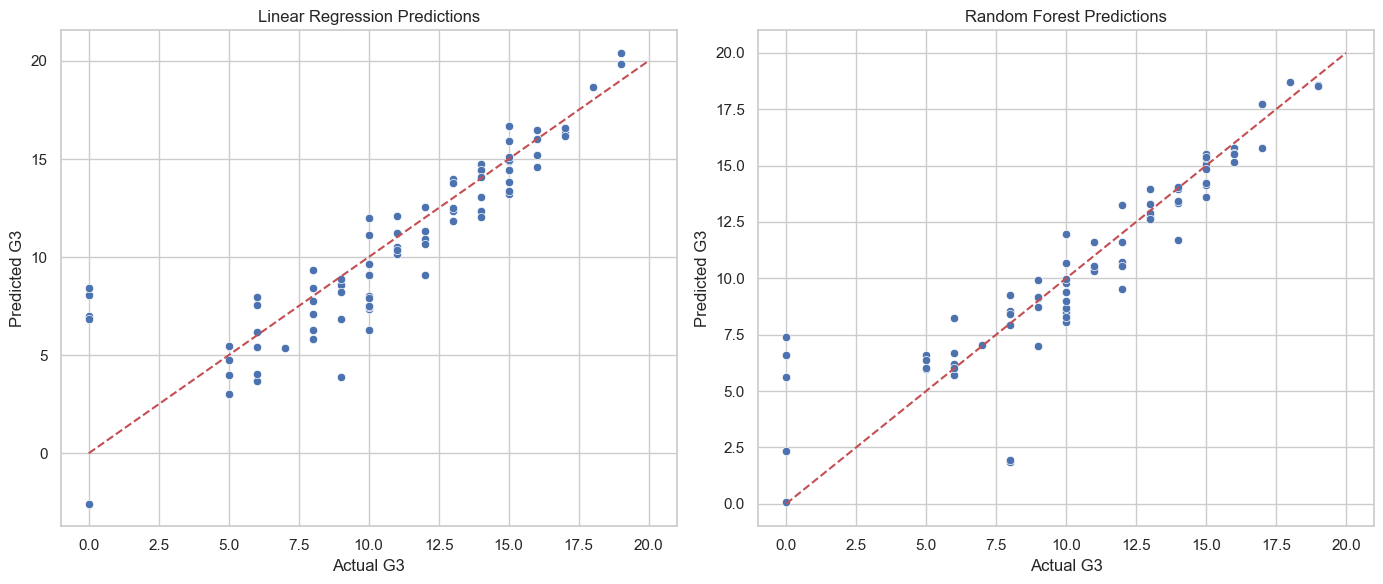

In [34]:
# Compare predicted vs actual for both models
plt.figure(figsize=(14, 6))

# Linear Regression
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=model.predict(X_test))
plt.plot([0, 20], [0, 20], 'r--')
plt.title('Linear Regression Predictions')
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")

# Random Forest
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([0, 20], [0, 20], 'r--')
plt.title('Random Forest Predictions')
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")

plt.tight_layout()
plt.show()


In [35]:
import joblib

# Save the trained model to a file
joblib.dump(rf_model, 'student_grade_predictor.pkl')

print("✅ Model saved as student_grade_predictor.pkl")


✅ Model saved as student_grade_predictor.pkl


In [36]:
# Load the saved model
loaded_model = joblib.load('student_grade_predictor.pkl')

# Use it for prediction
sample_prediction = loaded_model.predict(X_test[:5])
print("Sample predictions:", sample_prediction)


Sample predictions: [ 8.08 11.62  6.62  9.79  9.11]


In [37]:
print(X.columns.tolist())


['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'dalc', 'walc', 'health', 'absences', 'g1', 'g2']
